<a href="https://colab.research.google.com/github/lokesh331/lokesh12/blob/main/DAY_14_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values:
Product_ID         0
Product_Name       0
Region             0
Marketing_Spend    0
Sales              0
Effectiveness      0
Side_Effects       0
Age_Group          0
Trial_Period       0
dtype: int64
Columns in DataFrame:
Index(['Product_ID', 'Product_Name', 'Region', 'Marketing_Spend', 'Sales',
       'Effectiveness', 'Side_Effects', 'Age_Group', 'Trial_Period'],
      dtype='object')
The 'Product' column is missing.


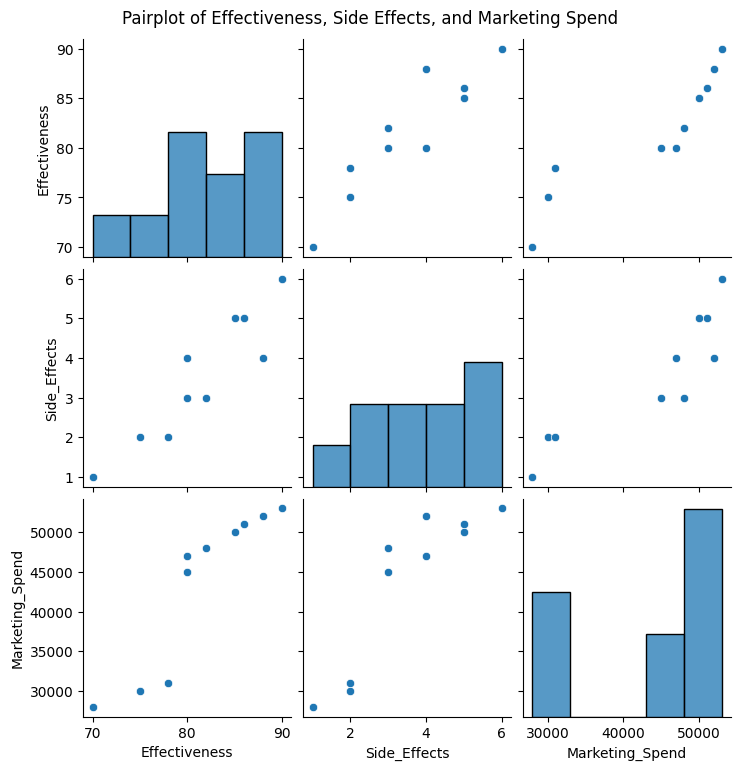

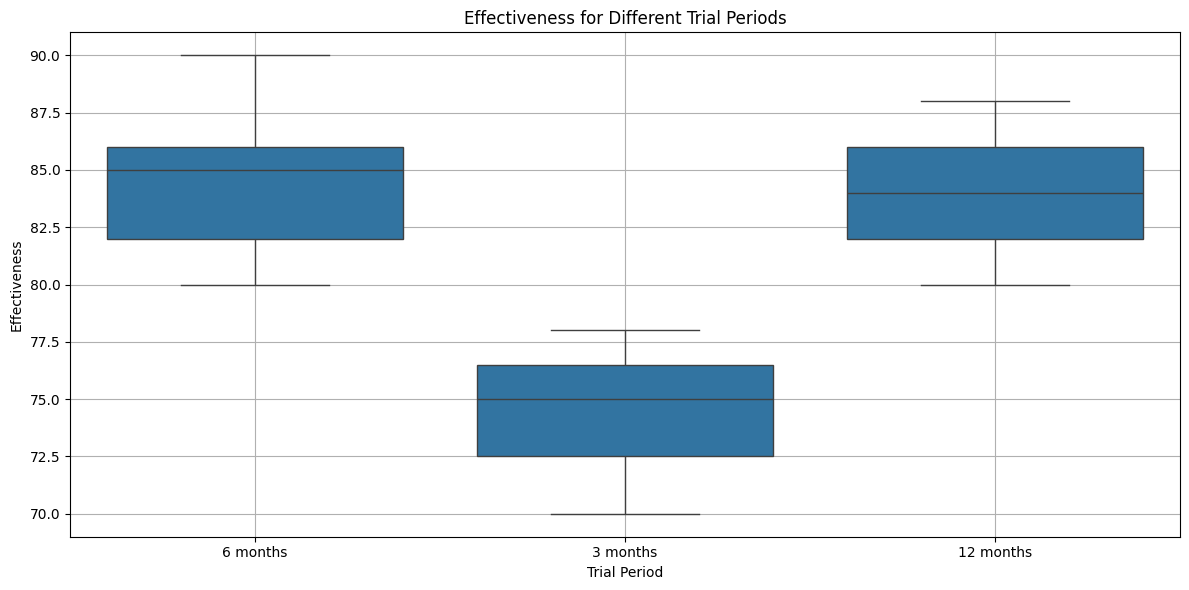

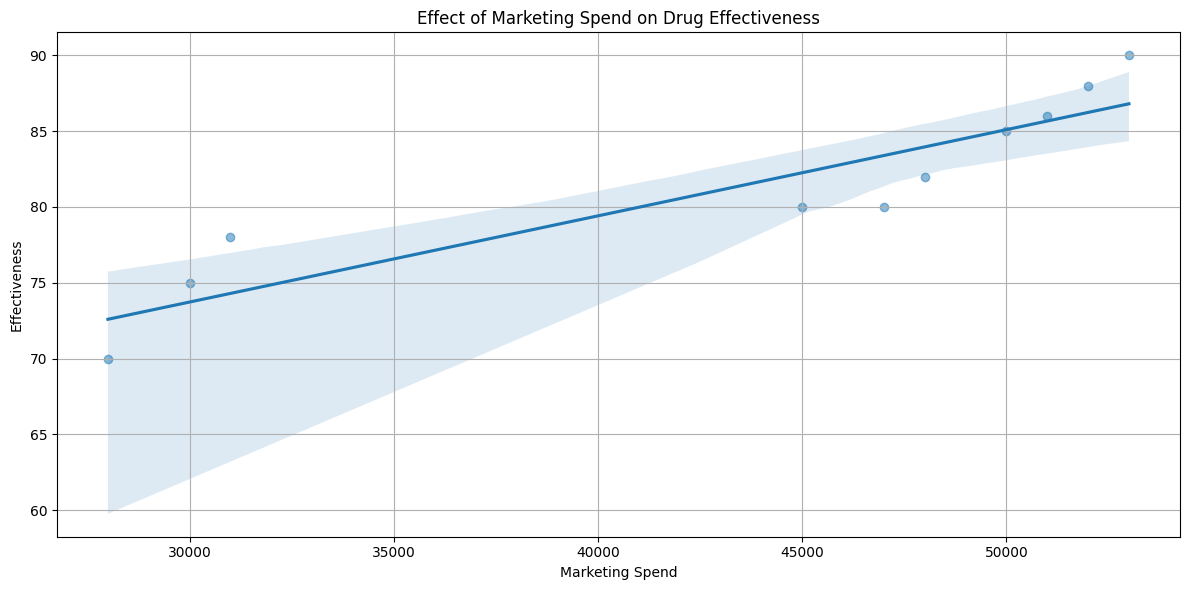

In [18]:
#day14
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'/content/drive/MyDrive/lokesh/Day_14_Pharma_data (1).csv'
df = pd.read_csv(file_path)
print("Missing values:")
print(df.isnull().sum())
df = df.drop_duplicates()
df.columns = df.columns.str.strip()
df['Effectiveness'] = df['Effectiveness'].fillna(df['Effectiveness'].mean())
df['Side_Effects'] = df['Side_Effects'].fillna(df['Side_Effects'].mean())
df['Marketing_Spend'] = df['Marketing_Spend'].fillna(df['Marketing_Spend'].mean())
print("Columns in DataFrame:")
print(df.columns)
if 'Product' in df.columns:
    plt.figure(figsize=(12, 6))
    avg_effectiveness_per_region = df.groupby(['Product', 'Region'])['Effectiveness'].mean().unstack()
    avg_effectiveness_per_region.plot(kind='bar', figsize=(12, 6), colormap='viridis')
    plt.title('Average Effectiveness for Each Drug Across Different Regions')
    plt.xlabel('Product')
    plt.ylabel('Average Effectiveness')
    plt.xticks(rotation=45)
    plt.legend(title='Region')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("The 'Product' column is missing.")
if 'Product' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=df, x='Product', y='Effectiveness', inner='quartile', color='lightblue')
    plt.title('Distribution of Effectiveness for Each Product')
    plt.xlabel('Product')
    plt.ylabel('Effectiveness')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.violinplot(data=df, x='Product', y='Side_Effects', inner='quartile', color='salmon')
    plt.title('Distribution of Side Effects for Each Product')
    plt.xlabel('Product')
    plt.ylabel('Side Effects')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
if 'Effectiveness' in df.columns and 'Side_Effects' in df.columns and 'Marketing_Spend' in df.columns:
    sns.pairplot(df[['Effectiveness', 'Side_Effects', 'Marketing_Spend']])
    plt.suptitle('Pairplot of Effectiveness, Side Effects, and Marketing Spend', y=1.02)
    plt.show()
else:
    print("One or more required columns are missing for the pairplot.")
if 'Trial_Period' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Trial_Period', y='Effectiveness')
    plt.title('Effectiveness for Different Trial Periods')
    plt.xlabel('Trial Period')
    plt.ylabel('Effectiveness')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("The 'Trial_Period' column is missing.")
if 'Marketing_Spend' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.regplot(data=df, x='Marketing_Spend', y='Effectiveness', scatter_kws={'alpha':0.5})
    plt.title('Effect of Marketing Spend on Drug Effectiveness')
    plt.xlabel('Marketing Spend')
    plt.ylabel('Effectiveness')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("The 'Marketing_Spend' column is missing.")
if 'Product' in df.columns:
    best_product = df.groupby('Product')['Effectiveness'].mean().idxmax()
    best_effectiveness = df.groupby('Product')['Effectiveness'].mean().max()
    print("The product with the best effectiveness")